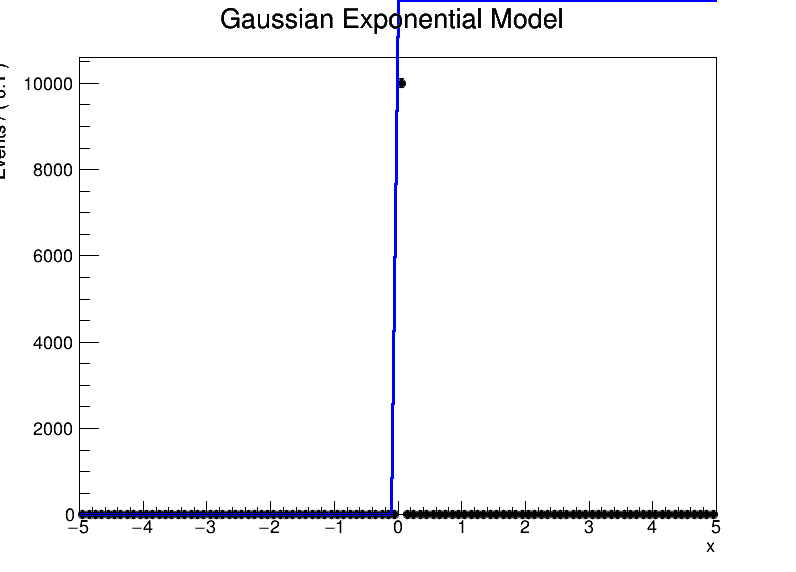

[#0] ERROR:Eval -- RooAbsReal::logEvalError(gexp_model) evaluation error, 
 origin       : RooGExpModel::gexp_model[ x=x mean=0 sigma=mean rlife=sigma meanSf=1 ssf=tau rsf=tau ]
 message      : p.d.f value is Not-a-Number
 server values: x=x=0, mean=0=0, sigma=mean=0, rlife=sigma=0.1, meanSf=1=1, ssf=tau=-0.11, rsf=tau=-0.11
[#0] WARNING:Plotting -- At observable [x]=0 RooRealIntegral::gexp_model_Norm[x][ gexp_model_Norm(x) ]
     function value is NAN @ !sumList=(), !intList=(), !anaList=(), !jacList=(), !facList=(), !func=gexp_model=nan/1, !sumCat=()
RooGExpModel::gexp_model[ x=x mean=0 sigma=mean rlife=sigma meanSf=1 ssf=tau rsf=tau ]
     p.d.f value is Not-a-Number @ x=x=0, mean=0=0, sigma=mean=0, rlife=sigma=0.1, meanSf=1=1, ssf=tau=-0.11, rsf=tau=-0.11
[#0] WARNING:Plotting -- At observable [x]=0.1 RooRealIntegral::gexp_model_Norm[x][ gexp_model_Norm(x) ]
     function value is NAN @ !sumList=(), !intList=(), !anaList=(), !jacList=(), !facList=(), !func=gexp_model=-0.0102441/1, 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file GExpModel_Example.png has been created


In [5]:
import ROOT
from ROOT import RooFit, RooRealVar, RooArgSet, RooGExpModel
from IPython.display import Image, display

# Define the variable x (observed variable)
x = ROOT.RooRealVar("x", "x", -5, 5)  # Define range from -5 to 5

# Define parameters for the Gaussian component
mean = ROOT.RooRealVar("mean", "Mean of Gaussian", 0, -5, 5)      # Mean
sigma = ROOT.RooRealVar("sigma", "Width of Gaussian", 0.02, 0.1, 5)  # Standard deviation

# Define parameters for the exponential tail
tau = ROOT.RooRealVar("tau", "Exponential decay", -0.11, -5, 0)  # Exponential decay constant

# Create a Gaussian Exponential model
gexp_model = RooGExpModel("gexp_model", "Gaussian Exponential Model", x, mean, sigma, tau)

# Generate toy data from the model
data = gexp_model.generate(RooArgSet(x), 10000)  # Generate 10,000 events

# Create a frame for plotting
xframe = x.frame(RooFit.Title("Gaussian Exponential Model"))

# Plot the generated data
data.plotOn(xframe)

# Plot the Gaussian Exponential model on the same frame
gexp_model.plotOn(xframe)

# Create a canvas to draw the plot
c1 = ROOT.TCanvas("c1", "Gaussian Exponential Model", 800, 600)
xframe.Draw()

# Save the plot as an image
c1.SaveAs("GExpModel_Example.png")

# Display the image in Jupyter notebook
display(Image(filename="GExpModel_Example.png"))


In [ ]:
import ROOT
from ROOT import RooFit, RooRealVar, RooArgSet, RooGExpModel
from IPython.display import Image, display

# Define the variable x (observed variable)
x = ROOT.RooRealVar("x", "x", -10, 10)  # Define range from -10 to 10

# Define parameters for the Gaussian component
mean = ROOT.RooRealVar("mean", "Mean of Gaussian", 0, -10, 10)      # Mean
sigma = ROOT.RooRealVar("sigma", "Width of Gaussian", 2, 0.1, 5)  # Standard deviation

# Define parameters for the exponential tail
tau = ROOT.RooRealVar("tau", "Exponential decay", -0.2, -5, 0)  # Exponential decay constant

# Create a Gaussian Exponential model
gexp_model = RooGExpModel("gexp_model", "Gaussian Exponential Model", x, mean, sigma, tau)

# Generate toy data from the model
data = gexp_model.generate(RooArgSet(x), 20000)  # Generate 20,000 events

# Create a frame for plotting
xframe = x.frame(RooFit.Title("Gaussian Exponential Model Fit"))

# Plot the generated data
data.plotOn(xframe)

# Plot the Gaussian Exponential model on the same frame
gexp_model.plotOn(xframe)

# Fit the model to the data
fit_result = gexp_model.fitTo(data, RooFit.PrintLevel(-1))

# Draw the fit results on the frame
gexp_model.plotOn(xframe, RooFit.LineColor(ROOT.kRed))

# Create a canvas to draw the plot
c1 = ROOT.TCanvas("c1", "Gaussian Exponential Model Fit", 800, 600)
xframe.Draw()

# Save the plot as an image
c1.SaveAs("GExpModel_Fit_Example.png")

# Display the image in Jupyter notebook
display(Image(filename="GExpModel_Fit_Example.png"))
